## <center><strong>MATPLOTLIB</strong></center>


### Matplotlib in a Notebook

>  Using the magic command `%matplotlib inline` you can display static images within your notebook

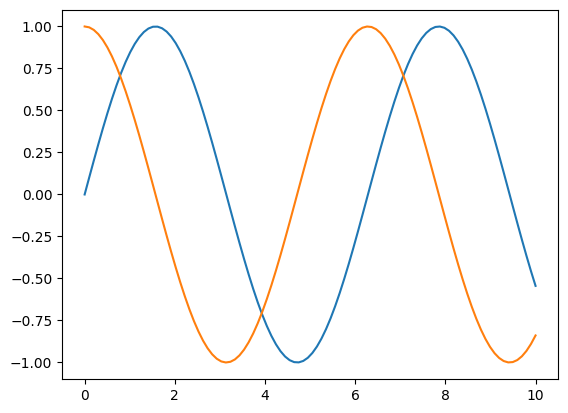

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

### Matplotlib in Ipython Terminal

`%matplotlib`

> In the ipython terminal, the magic command `%matplotlib` creates a conducive environment for using matplotlib. <br>Including picking a convenient available backend.

### Matplotlib in Terminal

> #### When using terminal, or running a python script, Matplotlib usually uses a non-interactive backend.
`matplotlib.use` selects a different(interactive) backend. <br>

The backends listed in  the docstring usually require external modules. <br>

`WebAgg` is most likely to work 

In [3]:
# import matplotlib
# matplotlib.use('WebAgg')
# """
#  GTK3Agg, GTK3Cairo, GTK4Agg, GTK4Cairo, MacOSX, nbAgg, notebook, QtAgg,
#       QtCairo, TkAgg, TkCairo, WebAgg, WX, WXAgg, WXCairo, Qt5Agg, Qt5Cairo
# """

# import matplotlib.pyplot as plt
# import numpy as np

# x = np.linspace(0, 10, 100)
# plt.plot(x, np.sin(x))
# plt.plot(x, np.cos(x))

# plt.pause(0.001)
# plt.draw()

You can save the above code in a .py file and run it at will

### <center> Ways to Use the MATPLOTLIB APIs</center>

#### Global API

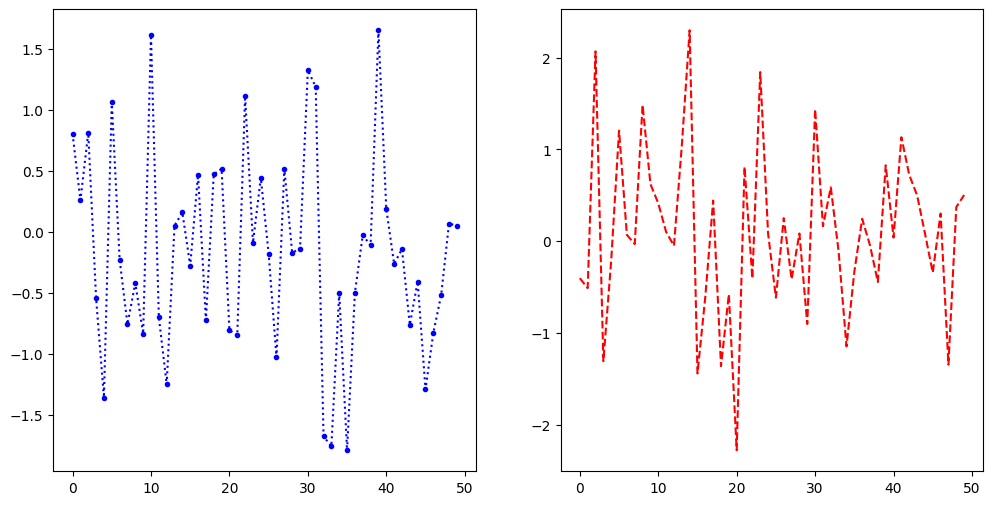

In [4]:
plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

plt.subplot(1, 2, 2)    #Select panel 2
plt.plot(np.random.randn(50), c='red', linestyle='--')


plt.subplot(1, 2, 1)    #Select panel 1
plt.plot(np.random.randn(50), c='blue', linestyle=':', marker='.')



#### Object Oriented API

(<Figure size 1400x600 with 4 Axes>,
 array([[<Axes: >, <Axes: >],
        [<Axes: >, <Axes: >]], dtype=object))

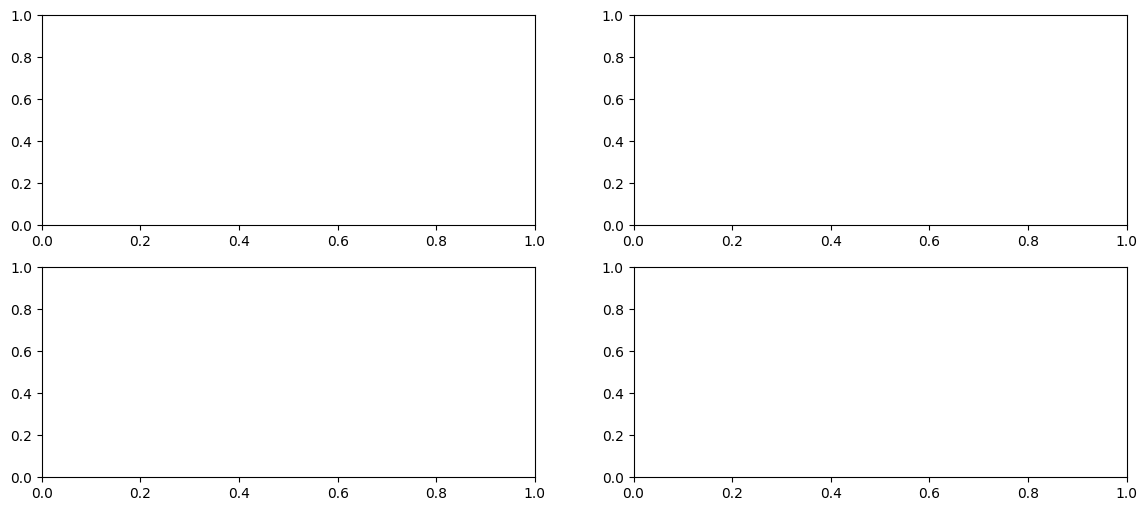

In [5]:
plot_objects = plt.subplots(nrows=2, ncols=2, figsize=(14, 6))
fig, ((axis1, axis2), (axis3, axis4)) = plot_objects
plot_objects

In [6]:
axis1.plot(np.random.randn(50), c = 'yellow', label ='yellow' )
axis2.plot(np.random.randn(50), c = 'orange', label = 'orange')
axis3.plot(np.random.randn(50), c = 'red', label = 'red')
axis4.plot(np.random.randn(50), c = 'green', label = 'green')
 

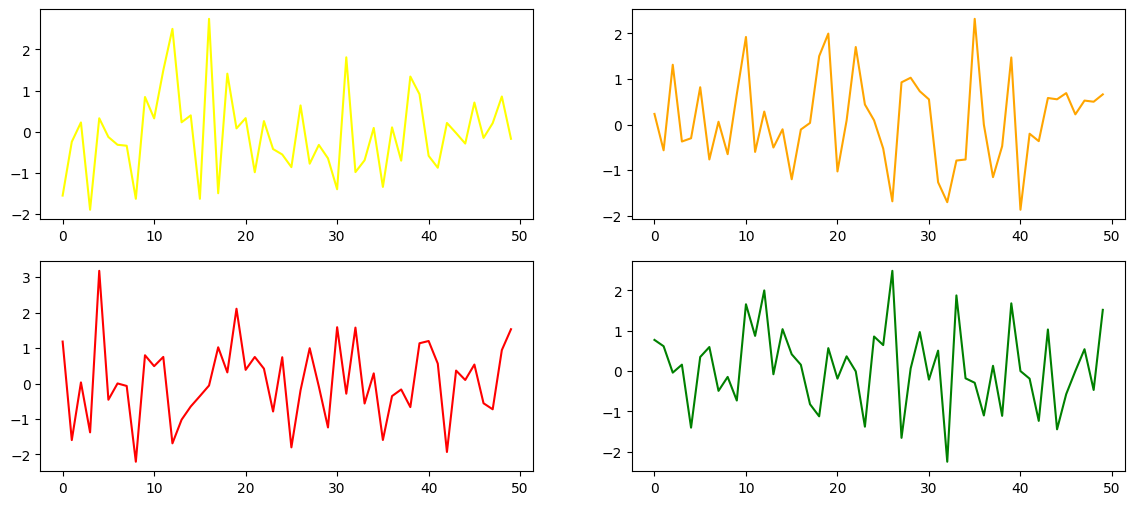

In [7]:
fig

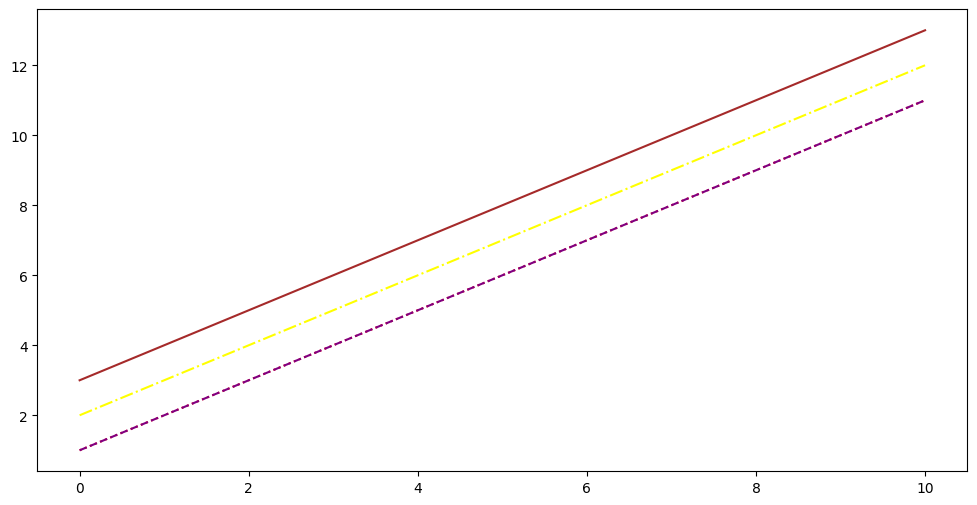

In [8]:
fig2, axes = plt.subplots(figsize= (12,6))
axes.plot(x, x+1, c= 'red', linestyle= ':')
axes.plot(x, x+2, c= 'yellow', linestyle= '-.')
axes.plot(x, x+3, c= 'brown', linestyle= '-')
axes.plot(x, x+1, c= 'purple', linestyle= '--')

#### The `subplot2grid` method
> a way to make subplots using a grid-like format


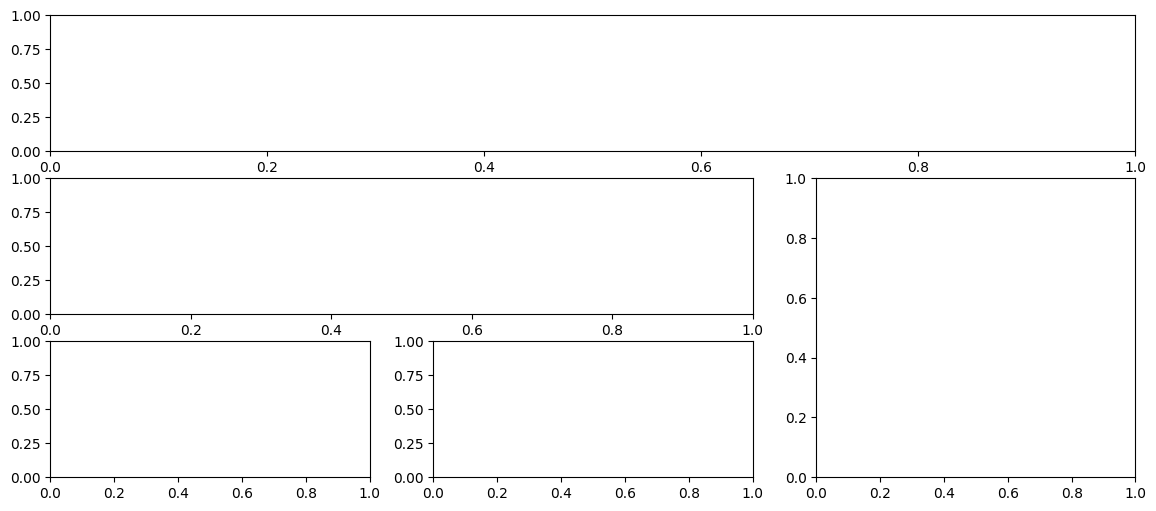

In [9]:
plt.figure(figsize=(14,6))
"""
plt.subplot2grid(
    shape: 'tuple[int, int]',
    loc: 'tuple[int, int]',
    rowspan: 'int' = 1,
    colspan: 'int' = 1,
    fig: 'Figure | None' = None,
    **kwargs,
) -> 'matplotlib.axes.Axes'
"""

ax1 = plt.subplot2grid((3,3), (0,0), colspan = 3 )
ax2 = plt.subplot2grid((3,3), (1,0), colspan = 2 )
ax3 = plt.subplot2grid((3,3), (1,2), rowspan = 2 )
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))

## <center><strong>SCATTER PLOT</strong> </center>

In [10]:
N = 50
x = np.random.rand(N) 
y = np.random.rand(N) 
colors = np.random.rand(N)
area = np.pi * (20 * np.random.rand(N))**2 # 0 - 15 point radii

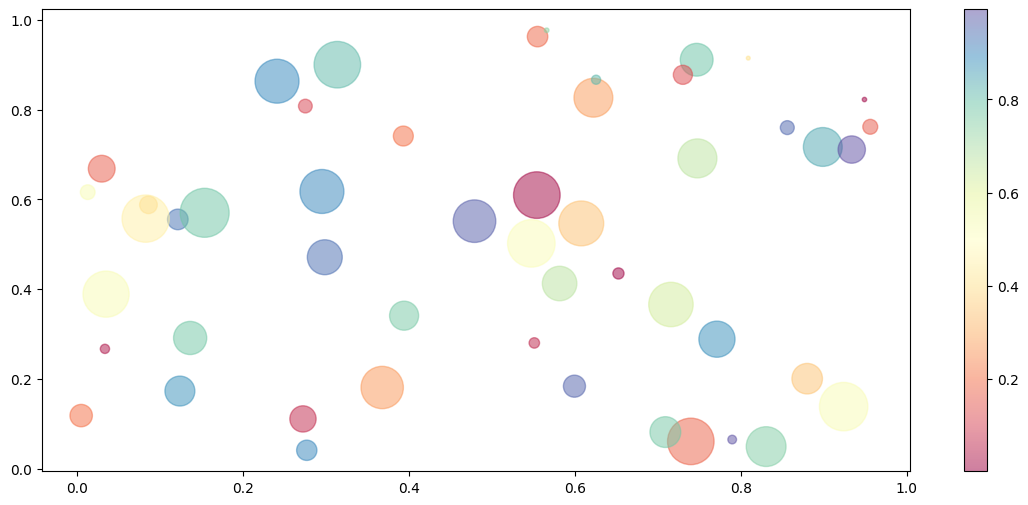

In [11]:
plt.figure(figsize=(14,6))
plt.scatter(x, y, s = area, c = colors, alpha=0.5, cmap='Spectral')
plt.colorbar()

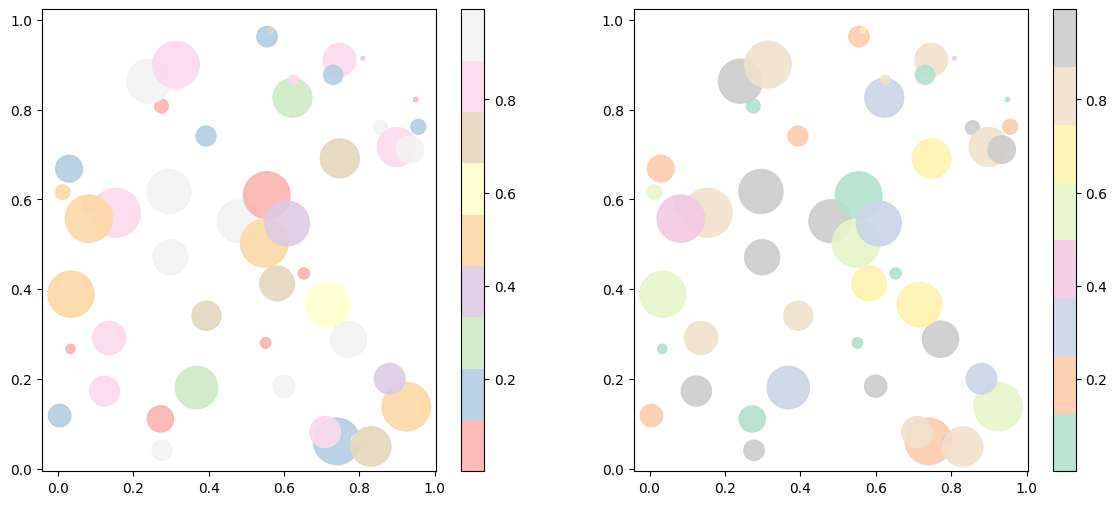

In [12]:
plt.subplots(1,2,figsize=(14,6))
plt.subplot(1,2,1)
plt.scatter(x, y, s=area, c=colors, alpha=0.9, cmap='Pastel1')
plt.colorbar()
plt.subplot(1,2,2)
plt.scatter(x, y, s=area, c=colors, alpha=0.9, cmap='Pastel2')
plt.colorbar()


## <center><strong>HISTOGRAM</strong> </center>

In [13]:
values = np.random.randn(1000)

(-5.0, 5.0)

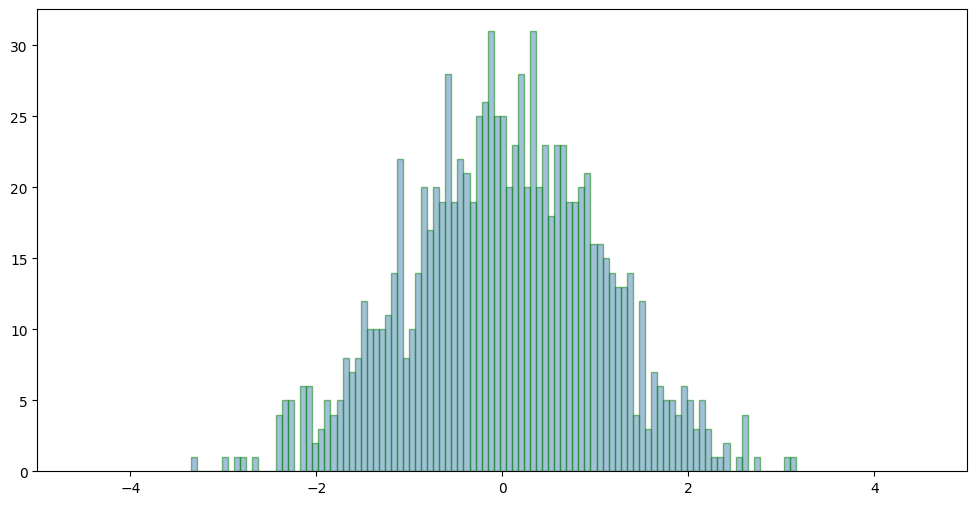

In [14]:
plt.subplots(figsize=(12,6))
plt.hist(values, bins=100, alpha=0.5, histtype='barstacked', color='steelblue', edgecolor='green')
plt.xlim(-5, 5)

In [15]:
!pwd

/home/kereophillus/Projects/Data_Analysis/notebooks


In [16]:
fig.savefig('/home/kereophillus/Projects/Data_Analysis/results/result.png')

## <center><strong>KERNEL DENSITY ESTIMATION</strong> </center>

In [17]:
from scipy import stats
# density = stats.kde.gaussian_kde(values)
'''
Please import `gaussian_kde` from the `scipy.stats` namespace;the `scipy.stats.kde` namespace is deprecated and will be removed in SciPy 2.0.0.
'''

density = stats.gaussian_kde(values)
density


(-5.0, 5.0)

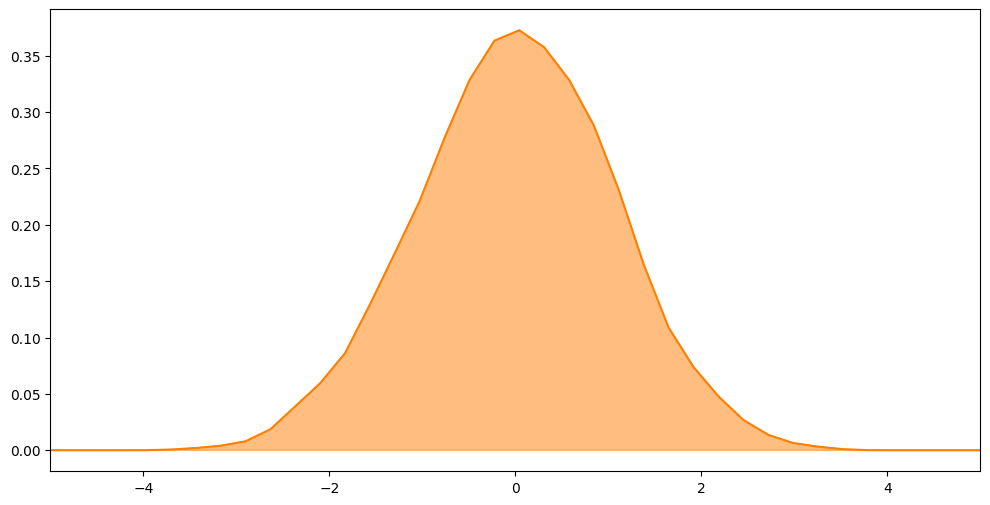

In [18]:
plt.subplots(figsize=(12,6))
values2 = np.linspace(min(values)-10, max(values)+10, 100)
plt.plot(values2, density(values2), color='#ff7f00')
plt.fill_between(values2, 0, density(values2), alpha=0.5, color='#ff7f00')
plt.xlim(-5,5)

In [19]:
from analysis_tools.display import Display
Display.display(
    ("values2",values2),
    ("density(values2)", density(values2))
    )

#### More Light on Kernel Density Estimation

(-3.709180754603161, 3.8240405232949195)

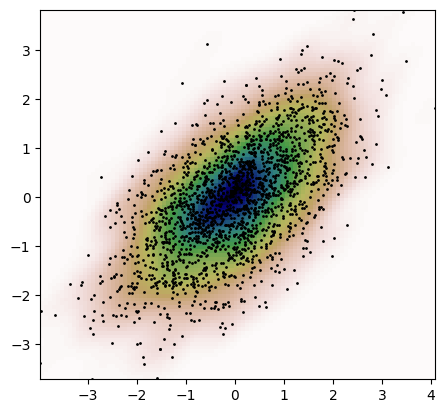

In [20]:
# Generate some random two-dimensional data:

import numpy as np
from scipy import stats

def measure(n):
    """Measurement model, return two coupled measurements."""
    m1 = np.random.normal(size=n)
    m2 = np.random.normal(scale=0.5, size=n)
    return m1+m2, m1-m2




m1, m2 = measure(2000)
xmin = m1.min()
xmax = m1.max()
ymin = m2.min()
ymax = m2.max()

"""    Perform a kernel density estimate on the data:"""

X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([m1, m2])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)

"""    Plot the results:"""

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.imshow(
    np.rot90(Z),
    cmap=plt.cm.gist_earth_r,
    extent=[xmin, xmax, ymin, ymax]
    )
ax.plot(m1, m2, 'k.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
# plt.show()

>   plt.xlabel   → ax.set_xlabel
    plt.ylabel   → ax.set_ylabel
    plt.xlim     → ax.set_xlim
    plt.ylim     → ax.set_ylim
    plt.title    → ax.set_title

In [80]:
rng.multivariate_normal?

Signature:
rng.multivariate_normal(
    mean,
    cov,
    size=None,
    check_valid='warn',
    tol=1e-08,
    *,
    method='svd',
)
Docstring:
multivariate_normal(mean, cov, size=None, check_valid='warn',
                    tol=1e-8, *, method='svd')

Draw random samples from a multivariate normal distribution.

The multivariate normal, multinormal or Gaussian distribution is a
generalization of the one-dimensional normal distribution to higher
dimensions.  Such a distribution is specified by its mean and
covariance matrix.  These parameters are analogous to the mean
(average or "center") and variance (the squared standard deviation,
or "width") of the one-dimensional normal distribution.

Parameters
----------
mean : 1-D array_like, of length N
    Mean of the N-dimensional distribution.
cov : 2-D array_like, of shape (N, N)
    Covariance matrix of the distribution. It must be symmetric and
    positive-semidefinite for proper sampling.
size : int or tuple of ints, optional
    